In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
symbol = "CELH"
start_date = "2023-12-31"
end_date = "2024-03-11"

# Download historical data using yfinance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,54.060001,59.139999,53.029999,59.029999,59.029999,6346600
2024-01-03,58.680000,59.680000,55.139999,55.360001,55.360001,4936500
2024-01-04,55.599998,58.660000,54.619999,56.549999,56.549999,4771300
2024-01-05,56.349998,59.330002,55.610001,57.279999,57.279999,3795800
2024-01-08,57.110001,58.160000,54.020000,58.150002,58.150002,4166200
2024-01-09,58.029999,60.700001,57.709999,58.080002,58.080002,5519000
2024-01-10,58.700001,60.209999,58.049999,59.790001,59.790001,3741600
2024-01-11,59.810001,60.650002,57.320000,59.060001,59.060001,3578300
2024-01-12,59.610001,62.049999,59.419998,60.349998,60.349998,3587400


In [3]:
# Adj Close data from the historical data
stock_data['Adj Close']

Date
2024-01-02    59.029999
2024-01-03    55.360001
2024-01-04    56.549999
2024-01-05    57.279999
2024-01-08    58.150002
2024-01-09    58.080002
2024-01-10    59.790001
2024-01-11    59.060001
2024-01-12    60.349998
2024-01-16    59.970001
2024-01-17    59.869999
2024-01-18    59.580002
2024-01-19    51.990002
2024-01-22    52.660000
2024-01-23    53.040001
2024-01-24    52.869999
2024-01-25    53.299999
2024-01-26    52.419998
2024-01-29    52.080002
2024-01-30    50.939999
2024-01-31    49.900002
2024-02-01    51.099998
2024-02-02    53.349998
2024-02-05    53.209999
2024-02-06    55.799999
2024-02-07    57.770000
2024-02-08    58.709999
2024-02-09    58.389999
2024-02-12    59.250000
2024-02-13    59.880001
2024-02-14    62.560001
2024-02-15    63.389999
2024-02-16    64.410004
2024-02-20    63.560001
2024-02-21    61.189999
2024-02-22    64.129997
2024-02-23    64.050003
2024-02-26    65.559998
2024-02-27    67.519997
2024-02-28    67.769997
2024-02-29    81.620003
2024-03-01 

In [4]:
# Extract relevant features (you may need to adjust this based on your model)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stock_data[features]
y = stock_data['Adj Close']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 1.3445227510460467


In [6]:
# Now, download the real-world data for the prediction period
prediction_start_date = "2023-12-31"
prediction_end_date = "2024-03-31"
prediction_data = yf.download(symbol, start=prediction_start_date, end=prediction_end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
# Make predictions on the prediction set
predictions_future = model.predict(prediction_data[features])

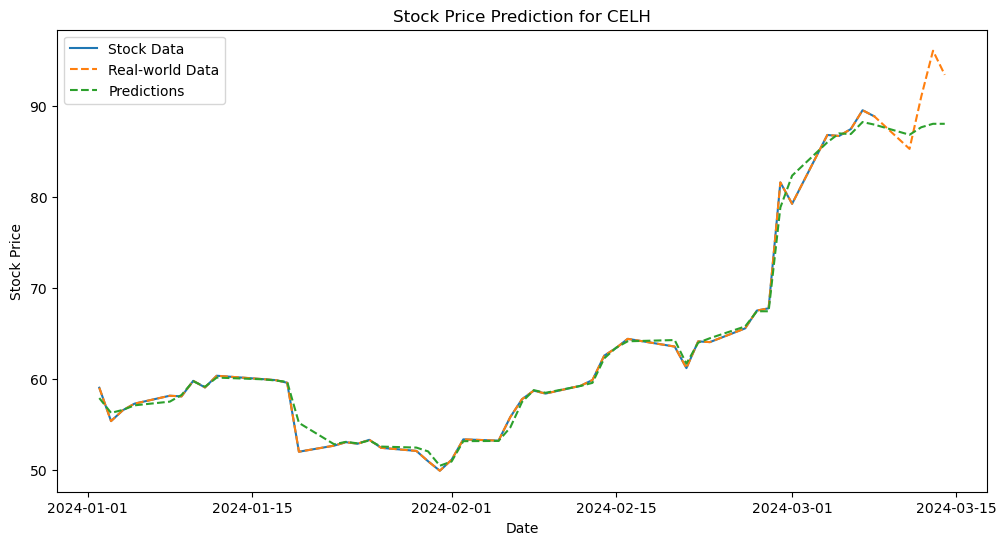

In [8]:
# Plot the real-world data and predictions
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Data')
plt.plot(prediction_data.index, prediction_data['Adj Close'], label='Real-world Data', linestyle='--')
plt.plot(prediction_data.index, predictions_future, label='Predictions', linestyle='--')
plt.title(f'Stock Price Prediction for {symbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
# Download historical data using yfinance
historical_data = yf.download(symbol, start=start_date, end=end_date)

# Use 'Adj Close' prices as the target variable
y = historical_data['Adj Close'].values.reshape(-1, 1)

# Use the index as a feature
X = historical_data.index.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [10]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the stock prices for the rest of the year
future_dates = pd.date_range(start="2024-03-01", end="2024-12-31")
future_dates_numeric = pd.to_numeric(future_dates)
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
future_predictions = model.predict(future_dates_numeric)

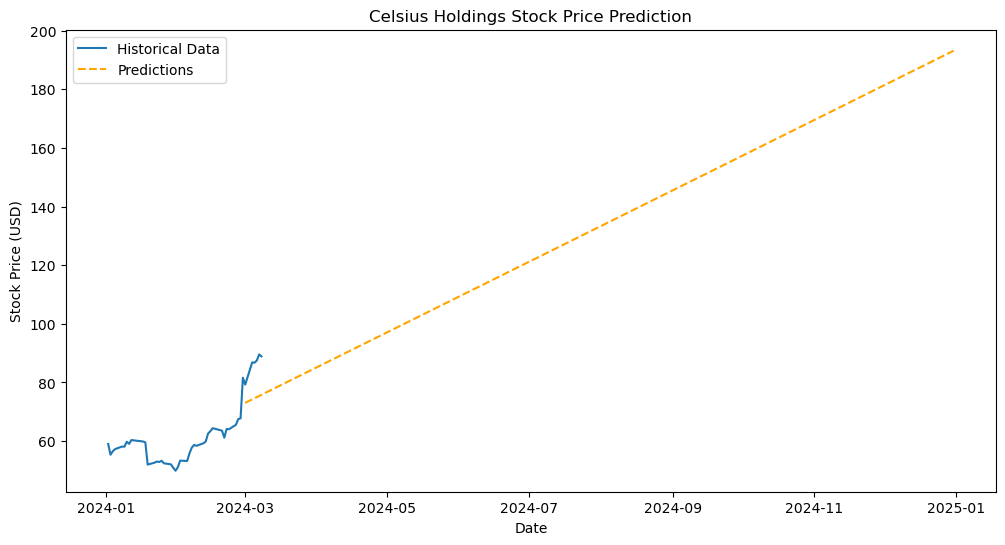

In [12]:
# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, y, label='Historical Data')
plt.plot(future_dates, future_predictions, label='Predictions', linestyle='dashed', color='orange')
plt.title('Celsius Holdings Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Getting Linear Regression Accuracy score by using R-squared

In [13]:
# Define the stock symbol and date range for historical data
symbol = "CELH"
start_date = "2022-01-01"
end_date = "2023-12-31"

# Download historical data using yfinance
historical_data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [14]:
# Reset the index to use numerical values instead of datetime
historical_data.reset_index(inplace=True)

# Use 'Adj Close' prices as the target variable
y = historical_data['Adj Close'].values.reshape(-1, 1)

# Use numerical index as a feature
X = historical_data.index.values.reshape(-1, 1)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the stock prices for the test set
y_pred = model.predict(X_test)

In [18]:
# Calculate the R-squared score
r_squared = model.score(X_test, y_test)
print("R-squared Score:", r_squared)

R-squared Score: 0.8420478682059745
